<a href="https://colab.research.google.com/github/humphrjk/Business_Analytics/blob/main/Sales_data_Forecasting_%20with%20Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
from prophet import Prophet

In [10]:
url = 'https://github.com/humphrjk/Business_Analytics/files/9389377/transactions.csv'
df = pd.read_csv(url)

In [15]:
df.head()

,date,store_nbr,transactions
0,1/1/2013,25,770
1,1/2/2013,1,2111
2,1/2/2013,2,2358
3,1/2/2013,3,3487
4,1/2/2013,4,1922


In [16]:
df.dtypes

date            object
store_nbr        int64
transactions     int64
dtype: object

In [23]:
df ['date'] = pd.to_datetime(df['date'])
df.dtypes

date            datetime64[ns]
transactions             int64
dtype: object

In [24]:
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2013-01-01,770
1,2013-01-02,2111
2,2013-01-02,2358
3,2013-01-02,3487
4,2013-01-02,1922


In [25]:
p = Prophet(interval_width=0.92, daily_seasonality=True)
model = p.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0trcvi00/axu3m94d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0trcvi00/kxhm7skf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40084', 'data', 'file=/tmp/tmp0trcvi00/axu3m94d.json', 'init=/tmp/tmp0trcvi00/kxhm7skf.json', 'output', 'file=/tmp/tmpdsb13_mw/prophet_model-20220821152054.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:21:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [26]:
future = p.make_future_dataframe(periods=200,freq='D')
future.tail()

,ds
1877,2018-02-27
1878,2018-02-28
1879,2018-03-01
1880,2018-03-02
1881,2018-03-03


In [27]:
forecast_prediction = p.predict(future)
forecast_prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1877,2018-02-27,995.069344,-79.635428,3370.842614,973.180123,1017.766679,599.524205,599.524205,599.524205,738.116418,738.116418,738.116418,-95.386601,-95.386601,-95.386601,-43.205611,-43.205611,-43.205611,0.0,0.0,0.0,1594.593550
1878,2018-02-28,995.242761,-36.982084,3253.971196,973.189853,1018.126224,626.417525,626.417525,626.417525,738.116418,738.116418,738.116418,-72.446802,-72.446802,-72.446802,-39.252092,-39.252092,-39.252092,0.0,0.0,0.0,1621.660285
1879,2018-03-01,995.416177,-79.467668,3069.238945,973.199582,1018.485768,559.741247,559.741247,559.741247,738.116418,738.116418,738.116418,-143.630022,-143.630022,-143.630022,-34.745148,-34.745148,-34.745148,0.0,0.0,0.0,1555.157424
1880,2018-03-02,995.589593,25.282893,3268.310555,973.209312,1018.845312,668.781379,668.781379,668.781379,738.116418,738.116418,738.116418,-39.476632,-39.476632,-39.476632,-29.858407,-29.858407,-29.858407,0.0,0.0,0.0,1664.370973
1881,2018-03-03,995.763010,378.817808,3733.893595,973.219041,1019.283749,969.278056,969.278056,969.278056,738.116418,738.116418,738.116418,255.934706,255.934706,255.934706,-24.773068,-24.773068,-24.773068,0.0,0.0,0.0,1965.041066


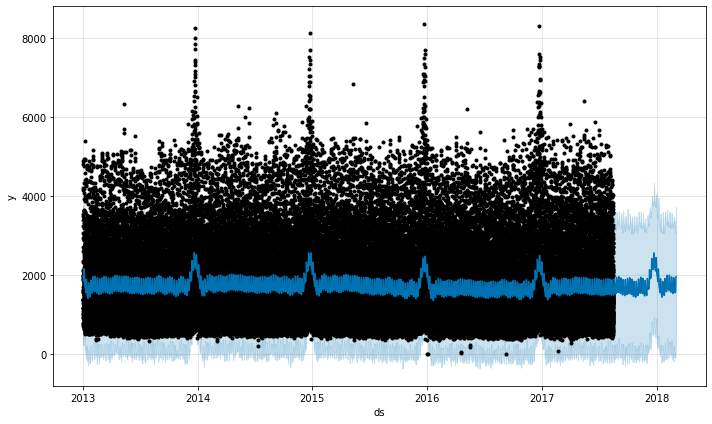

In [28]:
plot1 = p.plot(forecast_prediction)


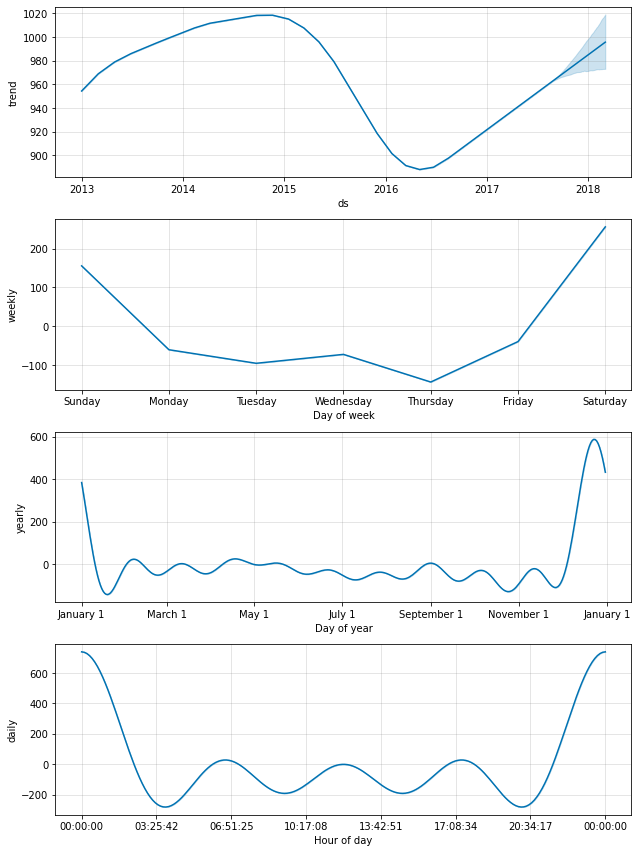

In [29]:
plot2 = p.plot_components(forecast_prediction)